This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/8_MLP_NN/)

# MultiLayer Perceptron Classifier

see https://scikit-learn.org/stable/modules/neural_networks_supervised.html

This first example aims at illustrating the interest of multilayer perceptron in a decision problem which is not linearly separable.  
The principle is identical to the principle of the simple (single layer) perceptron, but extends the learner strucrure to many layers.  

In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

## 1. Example of boolean functions
###  Create and visualize data for the logical "AND" and "OR"
$$ y = x_1 \& x_2 $$ $$ y = x_1 \text{ or } x_2 $$

red = 0 ; blue=1  : 


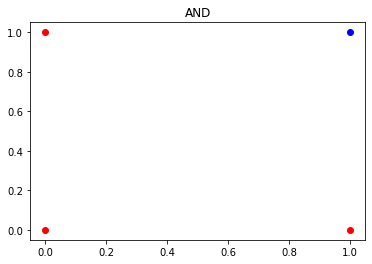

In [47]:
#logical AND
X=np.array([[0.,0.],[1.,1.],[1,0],[0,1]])
y=np.array([[0,1,0,0],[0,0,1,1]]) # AND on row 1, OR on row 2

for i in range(2):
    plt.figure()
    plt.scatter(X[y[i,:]==0,0],X[y[i,:]==0,1], c='r')
    plt.scatter(X[y[i,:]==1,0],X[y[i,:]==1,1], c='b')
    plt.title('AND' if i==0 else 'OR')
            
print('red = 0 ; blue=1  : ')

### Question
In the 2 examples above,
- are the 2 clusters linearly separable? 
- how many layers are necessary to separate the two clusters?
- Would a Perceptron (similar to the the one studied in N1_Perceptron.ipynb) be an acceptable solution? 

## Perceptron

We are going to implement a Perceptron as an MLP with *zero* hidden layer.

see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

for more information about the function and input/output prarameters

coefficient matrix sizes :  [(2, 1)]
MLPC coefs_ :[array([[16.24187426],
       [16.58837056]])]
MLPC intercepts_ :[array([-24.76874735])]
coefficient matrix sizes :  [(2, 1)]
MLPC coefs_ :[array([[-6.10010872e-05],
       [-2.01225475e-05]])]
MLPC intercepts_ :[array([-1.82174924e-05])]


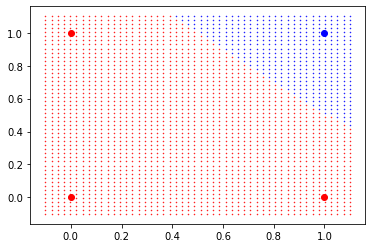

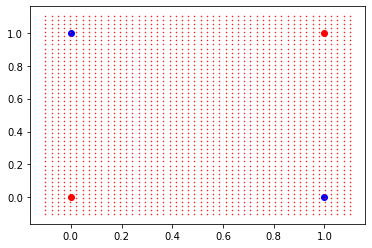

In [53]:
## This is just a perceptron !!
clf_lin = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=1, activation='logistic')

# prepare to plot
xx=np.linspace(-.1,1.1,50)
yy=np.linspace(-.1,1.1,50)
XX,YY= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T

for i in range(2):
    # fit the model
    clf_lin.fit(X,y[i,:])
    Z=clf_lin.predict(XY)
    
    plt.figure()
    plt.scatter(X[y[i,:]==0,0],X[y[i,:]==0,1], c='r')
    plt.scatter(X[y[i,:]==1,0],X[y[i,:]==1,1], c='b')
    plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='r',marker='.')
    plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='b',marker='.')

    print('coefficient matrix sizes : ', [coef.shape for coef in clf_lin.coefs_])
    print(f'MLPC coefs_ :{clf_lin.coefs_}')
    print(f'MLPC intercepts_ :{clf_lin.intercepts_}')

## Non-linear MLP

Now we add a hidden layer, to get a non-linear decision boundary

coefficient matrix sizes :  [(2, 3), (3, 1)]
MLPC coefs_ :[array([[-3.86979606, -7.8583442 , -5.51520129],
       [-4.00339952, -8.98966849, -5.2843855 ]]), array([[ -5.75940432],
       [ -3.00215976],
       [-21.95391282]])]
MLPC intercepts_ :[array([ 1.19153467, -0.49162058,  7.08324994]), array([8.98910799])]
coefficient matrix sizes :  [(2, 3), (3, 1)]
MLPC coefs_ :[array([[ 5.2060785 ,  7.77183683,  6.39427788],
       [ 1.87321532, -6.76847666, -5.18561875]]), array([[  2.87150485],
       [ 18.40194979],
       [-18.85619318]])]
MLPC intercepts_ :[array([-0.72650791, -4.92679037,  2.29878116]), array([7.28080342])]


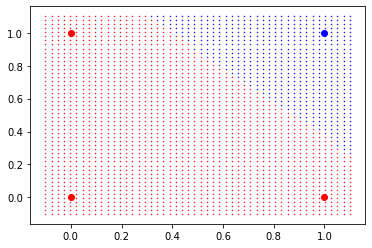

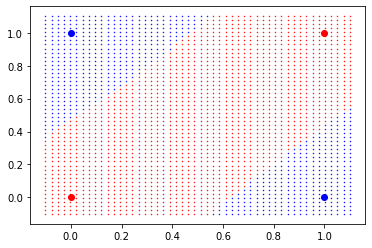

In [56]:
## One hidden layer of size 3
clf_nonlin = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,), random_state=1, activation='logistic')

for i in range(2):
    # fit the model
    clf_nonlin.fit(X,y[i,:])
    Z=clf_nonlin.predict(XY)
    
    plt.figure()
    plt.scatter(X[y[i,:]==0,0],X[y[i,:]==0,1], c='r')
    plt.scatter(X[y[i,:]==1,0],X[y[i,:]==1,1], c='b')
    plt.scatter(XY[Z==0,0],XY[Z==0,1],s=1,c='r',marker='.')
    plt.scatter(XY[Z==1,0],XY[Z==1,1],s=1,c='b',marker='.')
    
    print('coefficient matrix sizes : ', [coef.shape for coef in clf_nonlin.coefs_])
    print(f'MLPC coefs_ :{clf_nonlin.coefs_}')
    print(f'MLPC intercepts_ :{clf_nonlin.intercepts_}')

### Question
- Draw the learner structure and its edges with corresponding weights. (hint: play with hidden_layer_sizes)
- What is the activation function used in this MLP? 
- In the MLP computation above, 'lbfgs' is used as a solver, not 'sgd'. Explain why?
- take hidden_layer_sizes = (1,). Explain what you see

## 2. More realistic classification toy problem (concentric clusters)
This example is the same as in section 7. of N1_Perceptron.ipynb

(-5.597080475766099,
 6.2184624828791115,
 -4.800978633295132,
 7.0145643253500785)

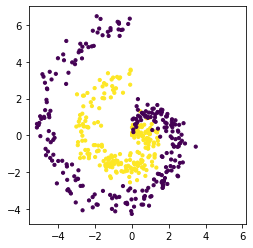

In [65]:
std=.4
N=500

circ_coord = np.zeros((N, 2))
circ_coord[:,0] = 2*np.pi*np.random.rand(N)
circ_coord[:int(N/2), 1] = np.abs(.1 + .5*circ_coord[:int(N/2), 0] + std*np.random.randn(int(N/2)))
circ_coord[int(N/2):, 1] = np.abs(1 + .8*circ_coord[int(N/2):, 0] + std*np.random.randn(int(N/2)))

X = np.zeros((N,2))
X[:,0] = circ_coord[:,1]*np.sin(circ_coord[:,0])
X[:,1] = circ_coord[:,1]*np.cos(circ_coord[:,0])

label = np.zeros(N)
label[:int(N/2)]=1

plt.scatter(X[:,0], X[:,1],c=label,s=10)
plt.axis('square')


In [78]:
# Learn a MLP Classifier : 
##########################
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,3), \
                    random_state=1, activation='relu', \
                    max_iter=2500)
clf.fit(X,label)


# Visualize some results
########################

plt.figure(figsize=[15,4])

plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c=label,s=10)
plt.axis('square');
plt.title('original data')

# sample the observation space :
xx=np.linspace(-7,7,100)
yy=np.linspace(-7,7,100)
XX,YY= np.meshgrid(xx,yy)
XY = np.vstack([XX.flatten(), YY.flatten()]).T
# Apply MLP Classif to the samples : 
Z=clf.predict(XY)
Pr=clf.predict_proba(XY)
Pr0=Pr[:,0]
Pr1=Pr[:,1]

# plot the probability values over the observation space :
plt.subplot(132)
Pr0=np.reshape(Pr0,[xx.size,yy.size])
plt.contourf(xx,yy,Pr0, levels=5)
plt.scatter(X[:,0],X[:,1],c=-label,s=10)
plt.axis('square')
plt.colorbar()
plt.title('proba of being in outside spiral')
plt.xlabel('x_1')
plt.xlabel('x_2')
plt.subplot(133)
Pr1=np.reshape(Pr1,[xx.size,yy.size])
plt.contourf(xx,yy,Pr1, levels=5)
plt.scatter(X[:,0],X[:,1],c=label,s=10)
plt.axis('square')
plt.colorbar()
plt.title('proba of being in inside spiral')
plt.xlabel('x_1')
plt.xlabel('x_2');

### Questions
- Run the learning process many times with input paramaters by changing hidden_layer_sizes. Comment your findings. Propose an interpretation.
- Increase the number of neurons in the first and second layer and comment your observation. Can you explain your findings? 
- What is different between this method and the method used in N1_Perceptron.ipynb notebook?  